In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Importing the data
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


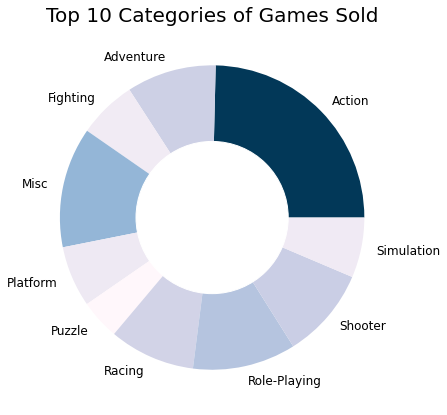

In [31]:
# Visualizing Top 10: Game Category
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

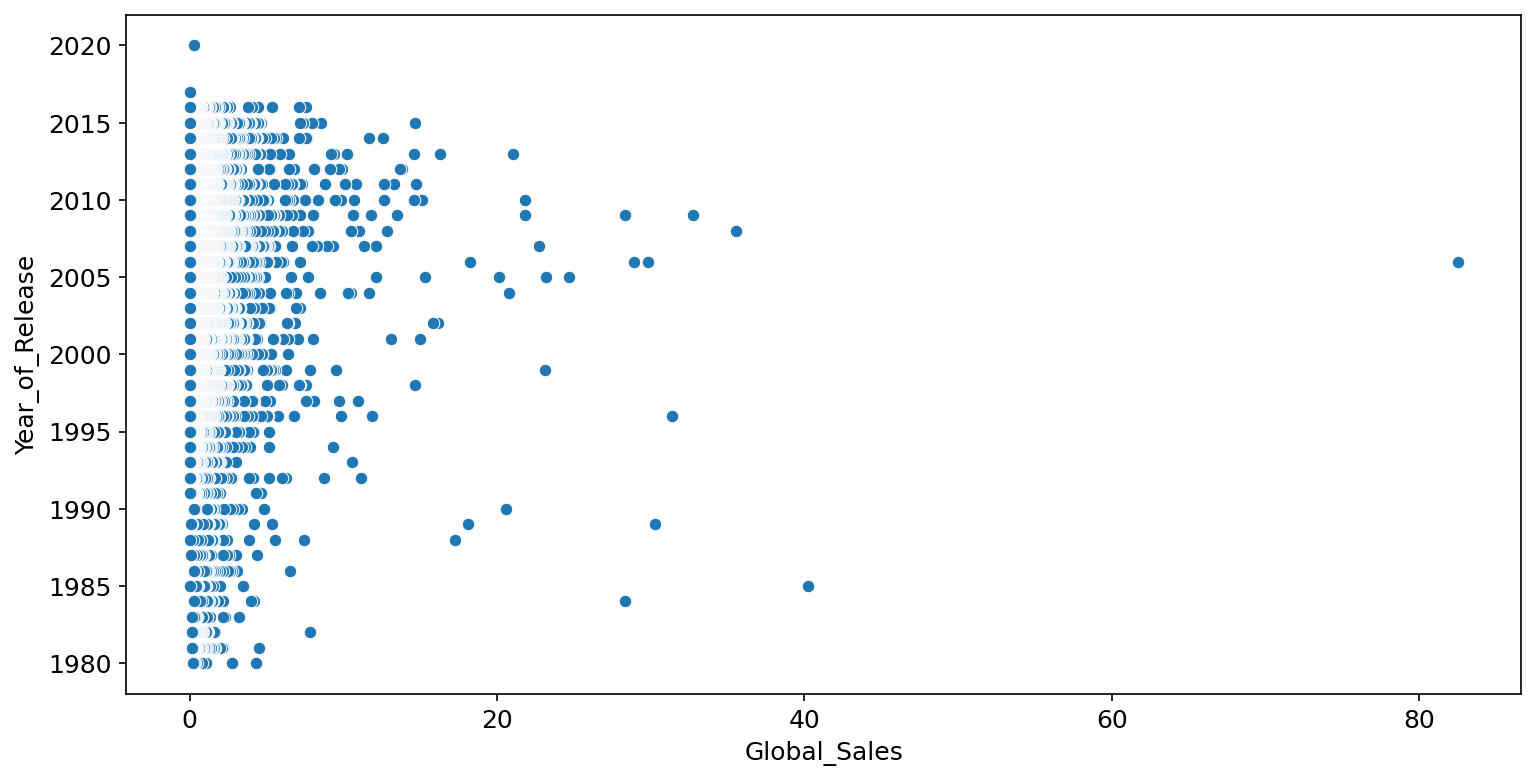

In [32]:
# Visualizing Year and Global Sales
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=data, y="Year_of_Release", x="Global_Sales")
plt.show()

Scatterplot explains that most game titles made global sales of below roughly $15 million mark, with some exceptionally good ones going beyond that. 

Also there is some outliers, with one game in particular released in 2006 making a breakthrough.

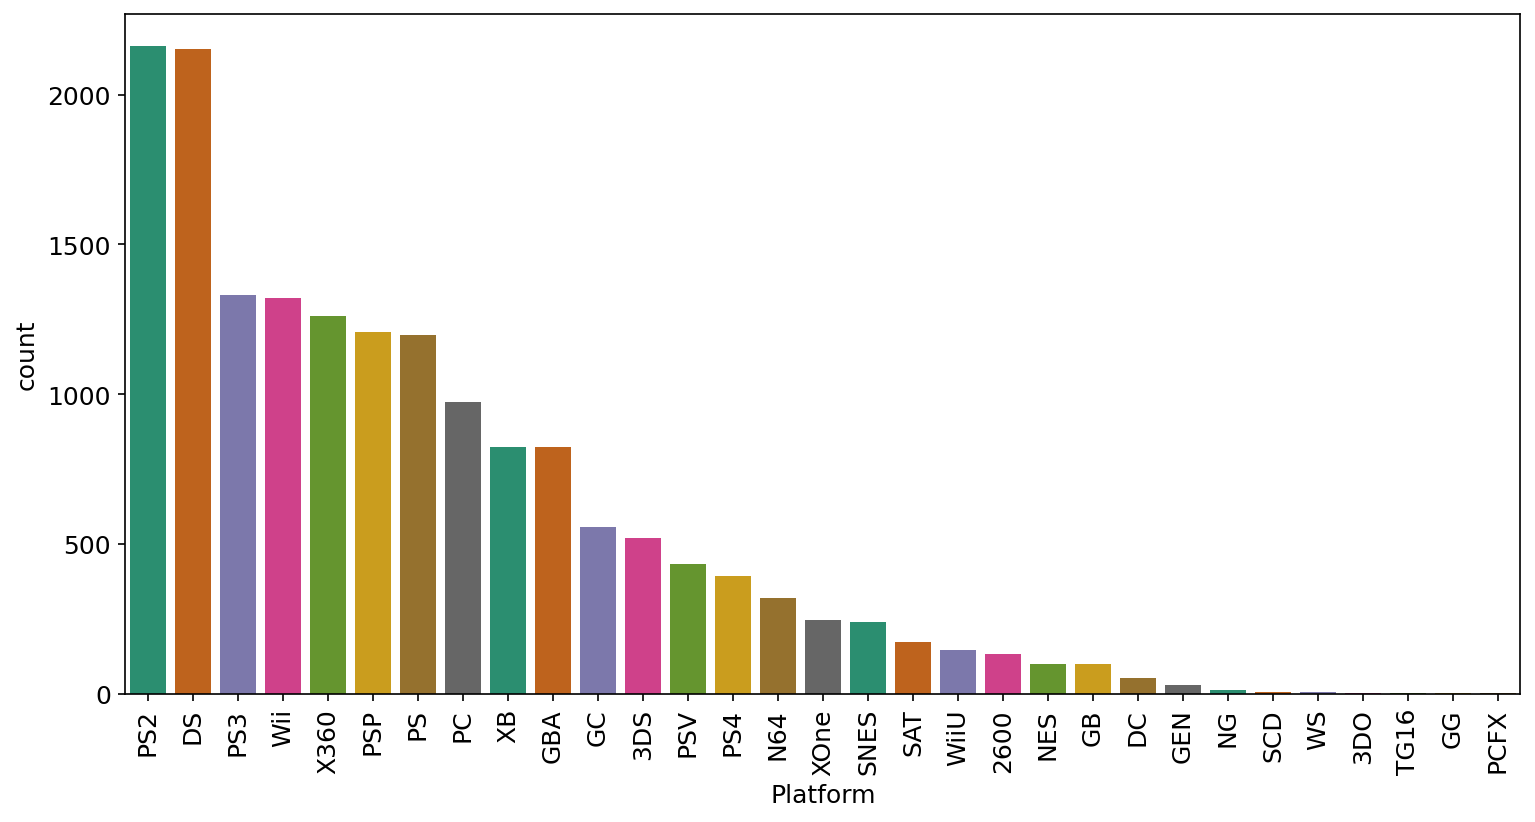

In [33]:
# Total Count of Games for each Platform
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=data,
              x="Platform",
              order = data["Platform"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

PlayStation 2 and Nintendo DS and have the most game in their platform.

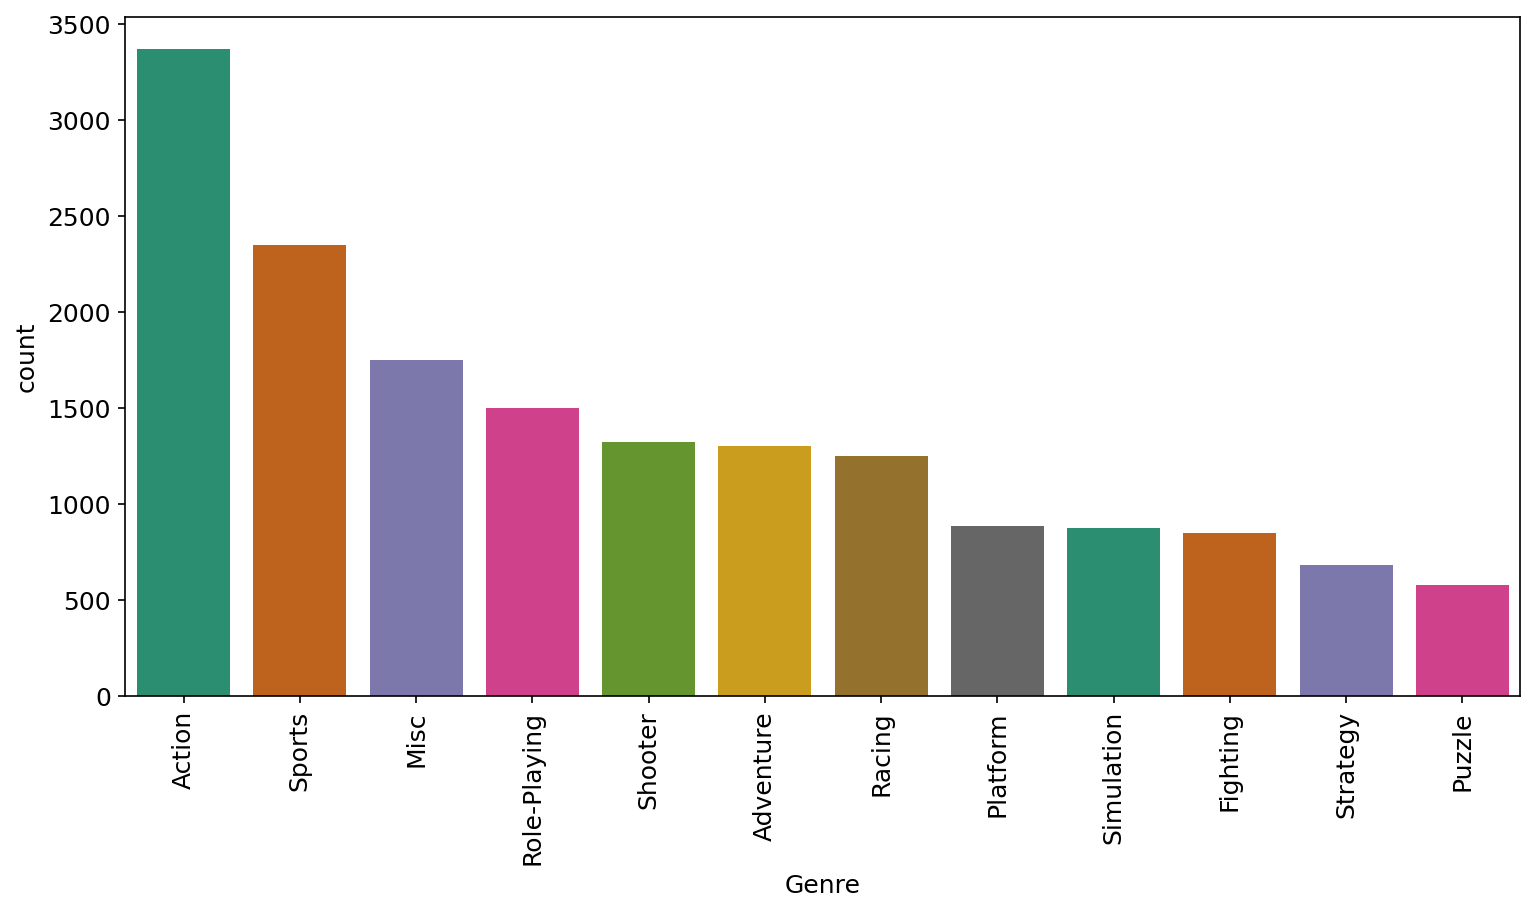

In [34]:
# Total Count of Games for each Genre
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=data,
              x="Genre",
              order = data["Genre"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

Genre: "Action" seems to be the one in which most game are released, following by Sports, Misc and Role-Playing.

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092562  0.003842 -0.168386     0.037700   
NA_Sales               -0.092562  1.000000  0.765336  0.449598     0.638654   
EU_Sales                0.003842  0.765336  1.000000  0.435068     0.722796   
JP_Sales               -0.168386  0.449598  0.435068  1.000000     0.291096   
Other_Sales             0.037700  0.638654  0.722796  0.291096     1.000000   
Global_Sales           -0.076433  0.941010  0.901239  0.612300     0.749242   
Critic_Score            0.011411  0.240755  0.220752  0.152593     0.198554   
Critic_Count            0.223407  0.295413  0.277533  0.180219     0.251639   
User_Score             -0.267851  0.086200  0.055337  0.125598     0.057119   
User_Count              0.175339  0.246429  0.283360  0.075638     0.238982   

                 Global_Sales  Critic_Score  Critic_Count  User_Score  \
Year_of_Release     -0.076433      0.011411      0.223407

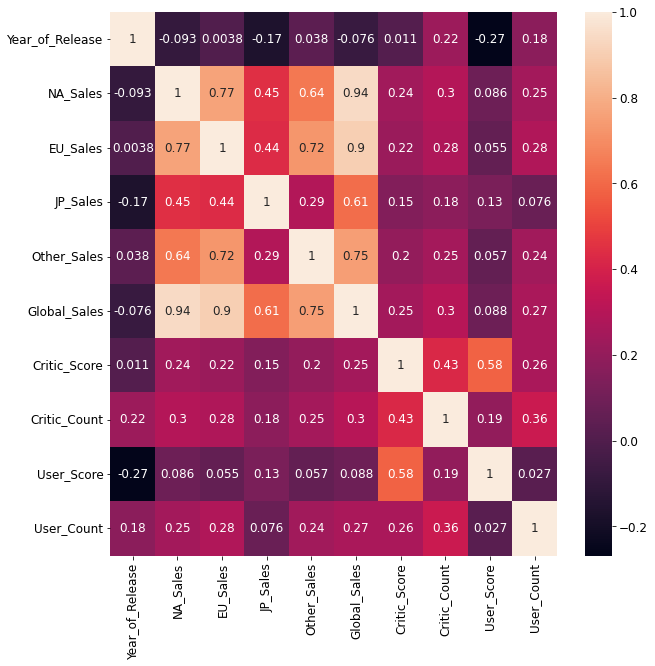

In [35]:
# Checking for correlation
print(data.corr())

# Heat map
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Heatmap depicts that all the sales columns are correlated to one another and no significant correlation between the other columns.

In [45]:
# To view the columns with missing values
print('Feature name || Total missing values')
print(data.isna().sum())

Feature name || Total missing values
Genre              2
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8582
Critic_Count    8582
User_Score      9129
User_Count      9129
Rating          6769
dtype: int64


In [44]:
# Dropping certain less important features
data.drop(columns = ['Name', 'Year_of_Release', 'Developer', 'Publisher', 'Platform'], inplace = True)

In [46]:
# Assigning X and y 
X = data.drop(columns="Global_Sales")
y = data["Global_Sales"]

# Splitting the dataset into Train and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [47]:
# Creating dummies for independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 9])], remainder = 'passthrough') 
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [48]:
# Importing XGBoost and training the model
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 200, learning_rate= 0.08)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [49]:
# Prediction
y_pred = model.predict(X_test)
# y_pred

In [50]:
# Unbiased Performance
from sklearn.metrics import r2_score, mean_squared_error
import math

r2_score = r2_score(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print(f"r2 score of the model : {r2_score:.2f}")
print(f"Root Mean Squared Error of the model : {rmse:.2f}")

r2 score of the model : 0.80
Root Mean Squared Error of the model : 0.61
